In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn
import os

In [2]:
# function that reads in the seperate data files
def read_data(file_path):
    full_path = os.path.join('..', 'Cleaned Data', file_path)

    return pd.read_json(full_path, lines=True)

In [3]:
# set seaborn for better graphs
seaborn.set()

# read in the reddit submission data
df1 = read_data('one/part-00000-9076dc6d-fa59-4c36-a0cf-8808e309da7b-c000.json.gz')
df2 = read_data('two/part-00000-c7cf2076-eae1-4d0c-bce1-e7b0c43a3bf1-c000.json.gz')
df3 = read_data('three/part-00000-662e59e6-5ee7-48da-a85f-1bcf09724f97-c000.json.gz')
df4 = read_data('four/part-00000-3060ac52-6be0-4d42-a322-3e4a7954a4f4-c000.json.gz')
df5 = read_data('five/part-00000-9c42996a-80d4-4a96-b59b-228f5e241a65-c000.json.gz')
df6 = read_data('six/part-00000-5da94b81-55c0-42e7-b3dc-5a51a14e8589-c000.json.gz')
df7 = read_data('seven/part-00000-eb573e13-d85e-400c-b3db-ffa9bd2d5543-c000.json.gz')
df8 = read_data('eight/part-00000-61526e86-ba2d-4df5-a9d1-d043ca875b62-c000.json.gz')
df9 = read_data('nine/part-00000-dc7c0356-fae4-47b8-a93a-f9b401cf70f0-c000.json.gz')
df10 = read_data('ten/part-00000-f3ae3925-50c4-469e-8304-6007e9b4cdab-c000.json.gz')
df11 = read_data('eleven/part-00000-2aa1781a-723e-49c4-a488-47ca50409657-c000.json.gz')
df12 = read_data('twelve/part-00000-7ff282ff-fa5e-494c-ab5c-59f07d2a2f0d-c000.json.gz')

# get the dataframes into one dataframe
frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
data = pd.concat(frames, ignore_index=True)

data

,name,downs,ups,hide_score,subreddit,locked,num_comments,id,score,author,...,is_self,date,datetime,word_count_self,word_count_title,preview,author_flair_css_class,author_flair_text,link_flair_css_class,link_flair_text
0,t3_41sawn,0,15,False,movies,False,22,41sawn,15,MrYoloSwaggins1,...,True,2016-01-19,2016-01-19 18:52:37-08:00,47,38,NaN,NaN,NaN,NaN,NaN
1,t3_3zdofz,0,1,False,rupaulsdragrace,False,2,3zdofz,1,valentineboy13,...,True,2016-01-03,2016-01-03 22:39:38-08:00,47,15,{'images': [{'id': 'zQm8BsqAjehABjQzsmr8aWNi-6...,NaN,NaN,NaN,NaN
2,t3_3zjgqe,0,1,False,HuhThatsOdd,False,1,3zjgqe,1,[deleted],...,True,2016-01-05,2016-01-05 01:35:23-08:00,2,12,NaN,NaN,NaN,NaN,NaN
3,t3_437sfn,0,1,False,mangogigi,False,1,437sfn,1,[deleted],...,True,2016-01-28,2016-01-28 23:13:17-08:00,2,13,NaN,NaN,NaN,NaN,NaN
4,t3_40pp1m,0,2,False,IWantThatOnAShirt,False,0,40pp1m,2,infiniterebellion,...,True,2016-01-12,2016-01-12 17:48:17-08:00,39,5,{'images': [{'id': 'bS0aj6Rjz5f3kGL5qMfAJVe_2E...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,t3_5k639h,0,2,False,careerguidance,False,3,5k639h,2,greentea30,...,True,2016-12-24,2016-12-24 17:05:17-08:00,47,13,NaN,NaN,NaN,NaN,NaN
299996,t3_5kszeg,0,0,False,FFXV,False,18,5kszeg,0,hammerblaze,...,True,2016-12-28,2016-12-28 14:11:29-08:00,19,18,NaN,NaN,NaN,NaN,NaN
299997,t3_5i1wv6,0,6,False,migraine,False,11,5i1wv6,6,Nafetsg,...,True,2016-12-12,2016-12-12 21:40:14-08:00,112,5,NaN,NaN,NaN,NaN,NaN
299998,t3_5h13d2,0,1,False,Toppiecers,False,0,5h13d2,1,polywaggot,...,True,2016-12-07,2016-12-07 09:10:29-08:00,12,4,NaN,NaN,NaN,NaN,NaN


In [4]:
# convert the spark timestamp type into datetime
data["datetime"] = pd.to_datetime(data["datetime"], utc=True)
data['datetime'] = pd.to_datetime(data['datetime']).dt.tz_convert('Etc/GMT+8')

In [5]:
# group the data by their hour
grouped = data.groupby(data['datetime'].dt.hour)

# get the average score for each hour 
averages_per_hour = grouped['score'].mean()

averages_per_hour

datetime
0     10.940299
1     13.283000
2     17.411077
3     16.925121
4     19.693562
5     19.877040
6     18.563646
7     14.361963
8     15.585788
9     13.218539
10    13.487368
11    12.314766
12    12.457223
13    13.442471
14    11.174803
15    12.917918
16    13.213019
17    13.224853
18    11.402596
19    11.383506
20    11.908251
21    12.095534
22    10.112790
23     9.539927
Name: score, dtype: float64

In [6]:
# create a linear fit for the averages
fit = stats.linregress(range(1,25, 1), averages_per_hour)

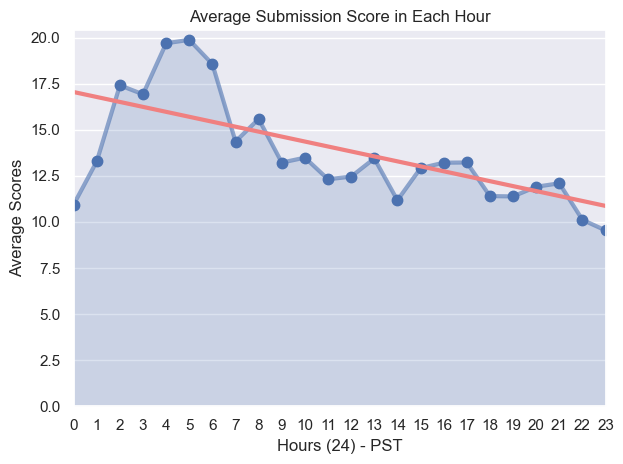

In [7]:
# plot the result
plt.plot(range(24), averages_per_hour, 'b.', alpha=1, markersize=15)
plt.plot(range(24), averages_per_hour, 'b-', alpha=0.6, linewidth=3)
plt.plot(range(24), range(24)*fit.slope + fit.intercept, '-', linewidth=3,  c='lightcoral')

plt.title("Average Submission Score in Each Hour")
plt.xlabel("Hours (24) - PST")
plt.ylabel("Average Scores")

plt.xlim(xmin=0.0, xmax=23)
plt.ylim(ymin=0.0)

plt.xticks(range(24))      
plt.grid(axis = 'x')
plt.fill_between(range(24), averages_per_hour, alpha=0.2)
plt.tight_layout()

plt.savefig('../Graphs/average_submission_by_hour.png')

In [8]:
# p-value is less than 0.05
fit.pvalue

0.000471779866479986

In [9]:
# r-value shows a fairly strong negative correlation
fit.rvalue

-0.658194683967434

In [10]:
fit.rvalue**2

0.43322024200299025

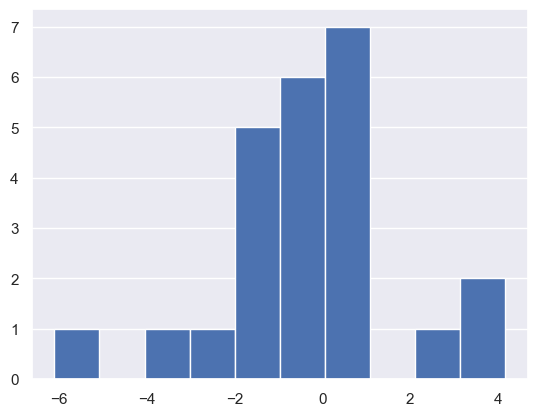

In [11]:
# get and plot the residuals - residuals look normal enough for me
plt.close()
residuals = averages_per_hour - (range(24)*fit.slope + fit.intercept)
plt.grid(axis = 'x')
plt.hist(residuals)
plt.savefig('../Graphs/residuals_submission_by_hour.png')